# 1. Loading and Preprocessing

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

# Load Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels (we'll drop this for clustering)

# Create DataFrame with feature names
iris_df = pd.DataFrame(X, columns=iris.feature_names)
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


# 2. Clustering Algorithm Implementation
# A) KMeans Clustering

C:\Users\Ajith\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


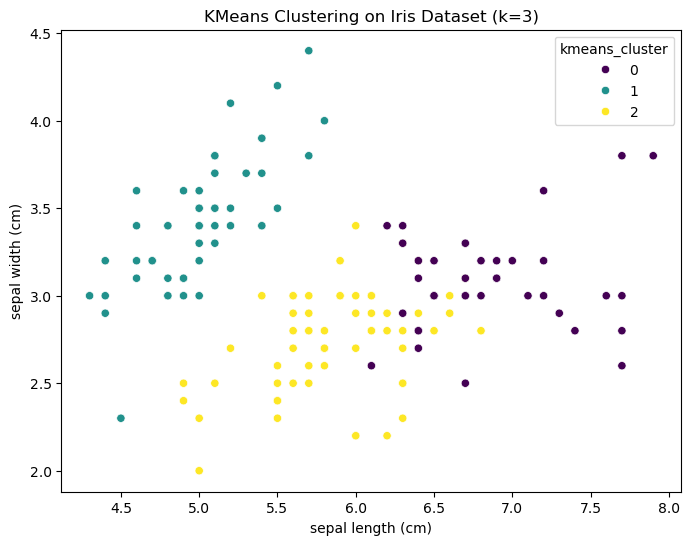

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Apply KMeans with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(iris_df)

# Add cluster labels to dataframe
iris_df['kmeans_cluster'] = kmeans.labels_

# Visualize clusters using first two features
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', 
                hue='kmeans_cluster', palette='viridis')
plt.title('KMeans Clustering on Iris Dataset (k=3)')
plt.show()

# B) Hierarchical Clustering

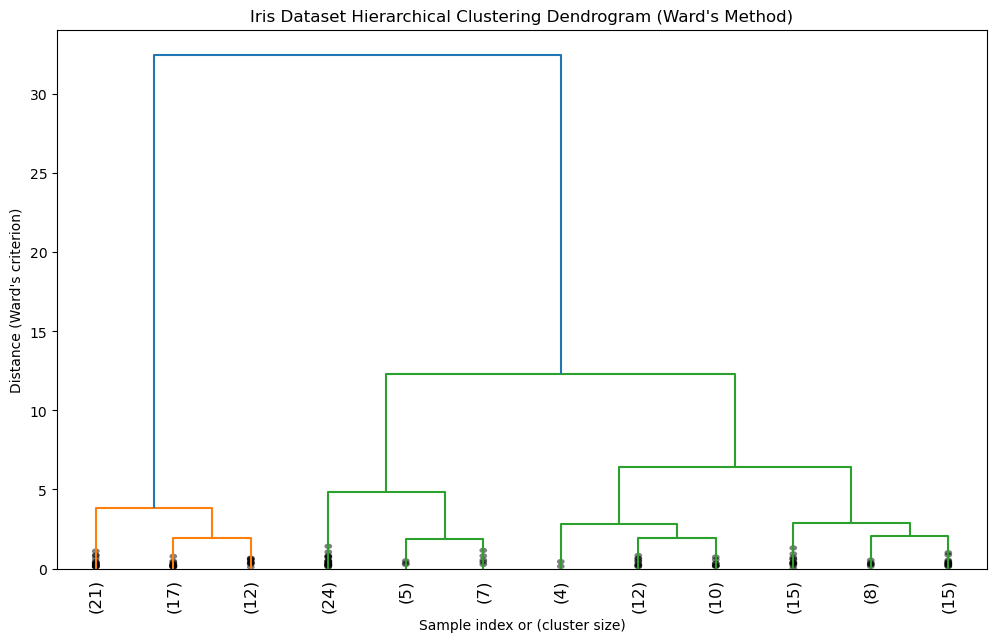

In [8]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# Perform hierarchical clustering using Ward's method
# We'll use the first 4 features (excluding the cluster labels we added earlier)
Z = linkage(iris.data, method='ward')

# Create a more informative dendrogram
plt.figure(figsize=(12, 7))
plt.title('Iris Dataset Hierarchical Clustering Dendrogram (Ward\'s Method)')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance (Ward\'s criterion)')

# Calculate full dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # Only show the last p merged clusters
    p=12,                   # Show 12 leaf nodes
    show_leaf_counts=True,  # Show numbers in brackets
    leaf_rotation=90.,      # Rotate labels
    leaf_font_size=12.,     # Label font size
    show_contracted=True,   # Show contracted branches
)
plt.show()